<a href="https://colab.research.google.com/github/currencyfxjle/Ingenieria-de-Datos/blob/main/Reto_IngenieriaDeDatos_JoseLizarragaEsquer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-8-0d30e94e5942>:51: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlaciones = EmpleadosAttrition.corr()["Attrition_Yes"]
<ipython-input-8-0d30e94e5942>:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EmpleadosAttritionFinal[f"C{i}"] = EmpleadosAttritionPCA[:, i]
<ipython-input-8-0d30e94e5942>:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

Varianza explicada por cada componente principal:
[0.45362458 0.30904954 0.13391291]


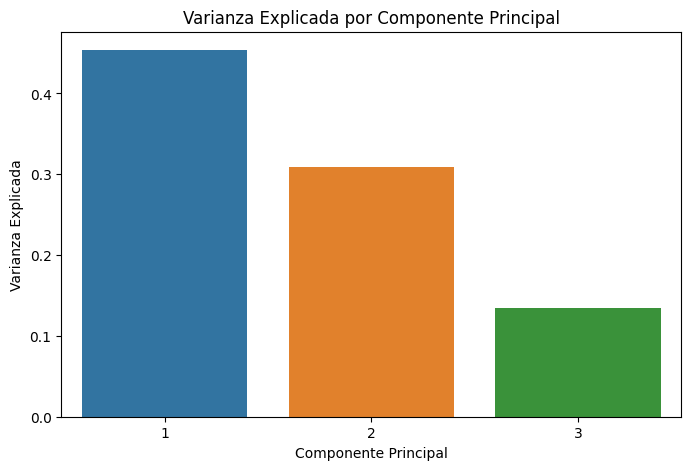

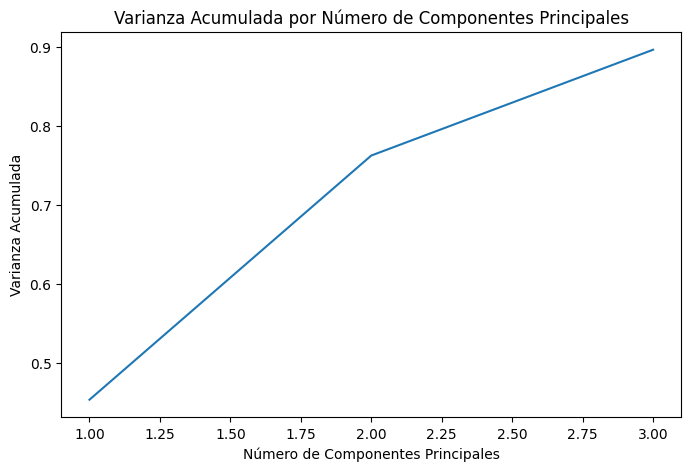

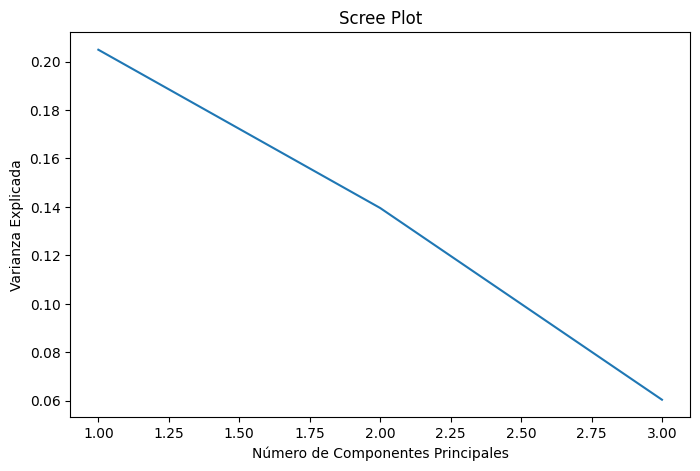

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Paso 1: Importa las librerías requeridas.

# Paso 2: Lee el archivo CSV y coloca los datos en un DataFrame llamado EmpleadosAttrition.
EmpleadosAttrition = pd.read_csv("/content/empleadosRETO.csv")

# Paso 3: Elimina columnas irrelevantes.
columnas_a_eliminar = ["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"]
EmpleadosAttrition.drop(columnas_a_eliminar, axis=1, inplace=True)

# Paso 4: Calcula los años que el empleado lleva en la compañía y maneja fechas inválidas.
EmpleadosAttrition["HiringDate"] = pd.to_datetime(EmpleadosAttrition["HiringDate"], errors="coerce")
EmpleadosAttrition["Year"] = EmpleadosAttrition["HiringDate"].dt.year
EmpleadosAttrition["Month"] = EmpleadosAttrition["HiringDate"].dt.month
EmpleadosAttrition["YearsAtCompany"] = 2018 - EmpleadosAttrition["Year"]

# Paso 5: Crea una columna llamada Year y obtén el año de contratación del empleado.
EmpleadosAttrition.drop(["Year", "Month"], axis=1, inplace=True)

# Paso 6: Crea una columna YearsAtCompany.
EmpleadosAttrition.drop("HiringDate", axis=1, inplace=True)

# Paso 7: Elimina "km" de la columna DistanceFromHome.
EmpleadosAttrition["DistanceFromHome"] = EmpleadosAttrition["DistanceFromHome"].str.replace(" km", "").astype(int)

# Paso 8: Renombra la variable DistanceFromHome.
EmpleadosAttrition.rename(columns={"DistanceFromHome": "DistanceFromHome_km"}, inplace=True)

# Paso 9: Crea una nueva variable DistanceFromHome que sea entera.
EmpleadosAttrition.drop("DistanceFromHome_km", axis=1, inplace=True)

# Paso 10: Borra las columnas Year, HiringDate y DistanceFromHome_km.
sueldo_promedio_depto = EmpleadosAttrition.groupby("Department")["MonthlyIncome"].mean().reset_index()
sueldo_promedio_depto.rename(columns={"MonthlyIncome": "SueldoPromedio"}, inplace=True)

# Paso 12: Escala la variable MonthlyIncome.
scaler = StandardScaler()
EmpleadosAttrition["MonthlyIncome"] = scaler.fit_transform(EmpleadosAttrition[["MonthlyIncome"]])

# Paso 13: Convierte las variables categóricas a numéricas.
categoricas = ["BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus", "Attrition"]
EmpleadosAttrition = pd.get_dummies(EmpleadosAttrition, columns=categoricas, drop_first=True)

# Paso 14: Calcula la correlación lineal con respecto a Attrition.
correlaciones = EmpleadosAttrition.corr()["Attrition_Yes"]

# Paso 15: Selecciona variables con correlación mayor o igual a 0.1.
variables_seleccionadas = correlaciones[correlaciones >= 0.1].index
EmpleadosAttritionFinal = EmpleadosAttrition[variables_seleccionadas]

# Paso 16: Realiza el Análisis de Componentes Principales (PCA).
X = EmpleadosAttritionFinal.drop("Attrition_Yes", axis=1)
pca = PCA(n_components=0.8)
EmpleadosAttritionPCA = pca.fit_transform(X)

# Paso 17: Agrega las componentes principales al DataFrame.
for i in range(EmpleadosAttritionPCA.shape[1]):
    EmpleadosAttritionFinal[f"C{i}"] = EmpleadosAttritionPCA[:, i]

# Imprime la varianza explicada
print("Varianza explicada por cada componente principal:")
print(pca.explained_variance_ratio_)

# Gráfico de Varianza Explicada
plt.figure(figsize=(8, 5))
sns.barplot(x=np.arange(1, pca.n_components_ + 1), y=pca.explained_variance_ratio_)
plt.xlabel("Componente Principal")
plt.ylabel("Varianza Explicada")
plt.title("Varianza Explicada por Componente Principal")
plt.show()

# Gráfico de Varianza Acumulada
plt.figure(figsize=(8, 5))
sns.lineplot(x=np.arange(1, pca.n_components_ + 1), y=np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Número de Componentes Principales")
plt.ylabel("Varianza Acumulada")
plt.title("Varianza Acumulada por Número de Componentes Principales")
plt.show()

# Scree Plot
plt.figure(figsize=(8, 5))
sns.lineplot(x=np.arange(1, pca.n_components_ + 1), y=pca.explained_variance_)
plt.xlabel("Número de Componentes Principales")
plt.ylabel("Varianza Explicada")
plt.title("Scree Plot")
plt.show()